## Shallow V.S Deep Neural Network

a. Generate the simulated data first using following equation. Sample 120k data as X from
uniform distribution [-2*Pi, 2*Pi], then feed the sampled X into the equation to get Y. Randomly
select 60K as training and 60 K as testing.

b. Train 3 versions of Neural Network, with different numbers of hidden layer (NN with 1 hidden
layer, 2 hidden layers and 3 hidden layers), using Mean squared error as objective function and
error measurement.

c. For each version, try different number of neurals in your NN and replicate the following left
plot (source: https://ojs.aaai.org/index.php/AAAI/article/view/10913). (You don’t need to
replicate exactly same results below but need to show the performance difference of 3 versions
of Neural Networks)

#### Loading Required Libraries

In [1]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np #Data Manipulation and Linear Algebra
import pandas as pd #Dataframe operations
import math #Math Functions
from tensorflow import keras #Deep Learning
from keras.models import Sequential
from statistics import mean
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_squared_error
import warnings
import matplotlib.pyplot as plt # Plotting Graphs
from sklearn.model_selection import cross_val_score, train_test_split # Cross Validation and Splitting Test/Tra
from sklearn.model_selection import GridSearchCV # Parameter Tuning
import warnings
warnings.filterwarnings('ignore') # Ignore warnings

#### Preparing the Data

In [5]:
pi = math.pi
data = np.random.uniform(-2*pi,2*pi,120000)
data

array([-4.07533071,  5.98757824, -3.41017589, ..., -6.13387611,
       -5.90697092, -4.83448624])

In [6]:
df = pd.DataFrame()
df['X'] = data
df.head()

,X
0,-4.075331
1,5.987578
2,-3.410176
3,-0.231024
4,-2.096992


In [7]:
# Using the function to map data according to given equation

df['y'] = df['X'].map(lambda x: ((((2*(math.cos(x)**2))-1))**2)*2)-1
df.head()

,X,y
0,-4.075331,-0.829067
1,5.987578,0.378678
2,-3.410176,0.476319
3,-0.231024,0.602557
4,-2.096992,-0.508968


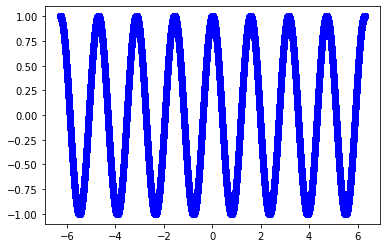

In [10]:
plt.scatter(X, y, color='blue')
plt.show()

#### Preparing Test-Train Sets

In [8]:
X = df['X']
y = df['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Defining the Models

In [11]:
# List for using different number of neurons

neurons = [20,40,60,80]

In [13]:
# Shallow Model

def model_1(unit):
    
    model1 = Sequential()
    model1.add(Dense(units=unit, activation ='relu', input_dim=1))
    model1.add(Dense(units=1))
    model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model1

In [14]:
# Medium Model

def model_2(unit):
    model2 = Sequential()
    model2.add(Dense(units=unit/2, activation='relu', input_dim=1))
    model2.add(Dense(units=unit/2, activation ='relu', input_dim=1))
    model2.add(Dense(units=1))
    model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model2

In [15]:
# Deep Model

def model_3(unit):
    model3 = Sequential()
    model3.add(Dense(units=round(unit/3), activation='relu', input_dim=1))
    model3.add(Dense(units=round(unit/3), activation ='relu', input_dim=1))
    model3.add(Dense(units=round(unit/3) + 1, activation ='relu', input_dim=1))
    model3.add(Dense(units=1))
    model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    return model3

In [16]:
error_shallow = []
error_medium = []
error_deep = []
units = []

#### Running the models with different number of Neurons

In [17]:
for neuron in neurons:
    
    model_shallow = model_1(neuron)
    model_medium = model_2(neuron)
    model_deep = model_3(neuron)
    
    #Running with verbose = 0 for a concise output for submitting
    result1 = model_shallow.fit(X_train,y_train, epochs=50, batch_size=100, verbose=0)
    result2 = model_medium.fit(X_train,y_train, epochs=50, batch_size=100, verbose=0)
    result3 = model_deep.fit(X_train,y_train, epochs=50, batch_size=100, verbose=0)
    
    y_pred_shallow = model_shallow.predict(X_test)
    y_pred_medium = model_medium.predict(X_test)
    y_pred_deep = model_deep.predict(X_test)
    
    mse_shallow = mean_squared_error(y_test, y_pred_shallow)
    mse_medium = mean_squared_error(y_test, y_pred_medium)
    mse_deep = mean_squared_error(y_test, y_pred_deep)
    
    error_shallow.append(mse_shallow)
    error_medium.append(mse_medium)
    error_deep.append(mse_deep)
    
    units.append(neuron)

Metal device set to: Apple M1 Max


2022-11-22 09:29:08.381347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 09:29:08.381695: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-22 09:29:08.876438: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 09:29:09.104530: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-22 09:30:27.898730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-22 09:32:08.758364: I tensorflow/core/grappler/o

#### Comparing the different models (Shallow V.S. Deep)

Below is the graph replicated for the models performance with MSE

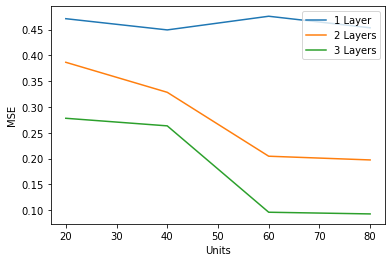

In [18]:
plt.plot(units,error_shallow,label='1 Layer')
plt.plot(units,error_medium,label='2 Layers')
plt.plot(units,error_deep,label='3 Layers')
plt.legend(loc='upper right')
plt.ylabel('MSE')
plt.xlabel('Units')
plt.show()